In [1]:
import pandas as pd
import json

## Forex Data

In [2]:
import json

# Open the JSON file and load the data
with open("Forex_data.json", "r") as file:
    data = json.load(file)

# Extract time series data
time_series_data = data['Time Series FX (Monthly)']

# Convert to DataFrame
df_forex = pd.DataFrame.from_dict(time_series_data, orient='index')

# Print the DataFrame
df_forex.head(1000)


,1. open,2. high,3. low,4. close
2024-02-19,1.08180,1.08974,1.06945,1.07804
2024-01-31,1.10400,1.10460,1.07947,1.08180
2023-12-29,1.08860,1.11395,1.07230,1.10374
2023-11-30,1.05740,1.10171,1.05165,1.08861
2023-10-31,1.05676,1.06943,1.04480,1.05744
...,...,...,...,...
2005-05-31,1.28590,1.29900,1.22920,1.23050
2005-04-29,1.29590,1.31240,1.27750,1.28690
2005-03-31,1.31830,1.34810,1.28520,1.29620
2005-02-28,1.30220,1.32780,1.27280,1.32220


In [3]:
df_forex.describe()

,1. open,2. high,3. low,4. close
count,230,230,230,230
unique,227,229,226,225
top,1.36290,1.22070,1.32110,1.32410
freq,3,2,2,2


Observations:
pour chacune des colonnes, il y a 230 entrées non nulles.
Les valeurs uniques dans chaque colonne indiquent qu'il y a un nombre limité de valeurs différentes.
Les valeurs "top" (les plus fréquentes) sont des nombres spécifiques dans chacune des colonnes.
Les fréquences indiquent le nombre de fois que la valeur la plus fréquente apparaît dans chaque colonne, ce qui est raisonnable compte tenu du nombre total d'entrées.

### on vérifie les types de données

In [4]:
df_forex.dtypes

1. open     object
2. high     object
3. low      object
4. close    object
dtype: object

#### conversion +modification du nom 

In [5]:
# Convertir les colonnes nécessaires en types float
df_forex['1. open'] = df_forex['1. open'].astype(float)
df_forex['2. high'] = df_forex['2. high'].astype(float)
df_forex['3. low'] = df_forex['3. low'].astype(float)
df_forex['4. close'] = df_forex['4. close'].astype(float)

df_forex = df_forex.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close'})
df_forex


,Open,High,Low,Close
2024-02-19,1.08180,1.08974,1.06945,1.07804
2024-01-31,1.10400,1.10460,1.07947,1.08180
2023-12-29,1.08860,1.11395,1.07230,1.10374
2023-11-30,1.05740,1.10171,1.05165,1.08861
2023-10-31,1.05676,1.06943,1.04480,1.05744
...,...,...,...,...
2005-05-31,1.28590,1.29900,1.22920,1.23050
2005-04-29,1.29590,1.31240,1.27750,1.28690
2005-03-31,1.31830,1.34810,1.28520,1.29620
2005-02-28,1.30220,1.32780,1.27280,1.32220


In [6]:
df_forex.index
# Convertir l'index en datetime
df_forex.index = pd.to_datetime(df_forex.index)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Créer une figure avec des bougies financières
fig = go.Figure(data=[go.Candlestick(x=df_forex.index,
                                     open=df_forex['Open'],
                                     high=df_forex['High'],
                                     low=df_forex['Low'],
                                     close=df_forex['Close'])])

# Mettre en forme le titre et les axes
fig.update_layout(title='Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')

# Afficher la figure
fig.show()

In [8]:
import datetime

# Ajouter une année à la date de fin pour inclure une année complète
end_date = df_forex.index[-1] + datetime.timedelta(days=365)

# Regrouper les données par année et calculer les valeurs moyennes
df_yearly = df_forex.resample('YS', closed='left', label='left').mean()

# Créer une figure avec des bougies financières pour l'analyse annuelle
fig_yearly = go.Figure(data=[go.Candlestick(x=df_yearly.index,
                                            open=df_yearly['Open'],
                                            high=df_yearly['High'],
                                            low=df_yearly['Low'],
                                            close=df_yearly['Close'])])

# Mettre en forme le titre et les axes
fig_yearly.update_layout(title='Candlestick Chart - Yearly Analysis',
                         xaxis_title='Date',
                         yaxis_title='Price')

# Afficher la figure pour l'analyse annuelle
fig_yearly.show()

C:\Users\yskon\AppData\Local\Temp\ipykernel_26548\3528672805.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\yskon\AppData\Local\Temp\ipykernel_26548\3528672805.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\yskon\AppData\Local\Temp\ipykernel_26548\3528672805.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\yskon\AppData\Local\Temp\ipykernel_26548\3528672805.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

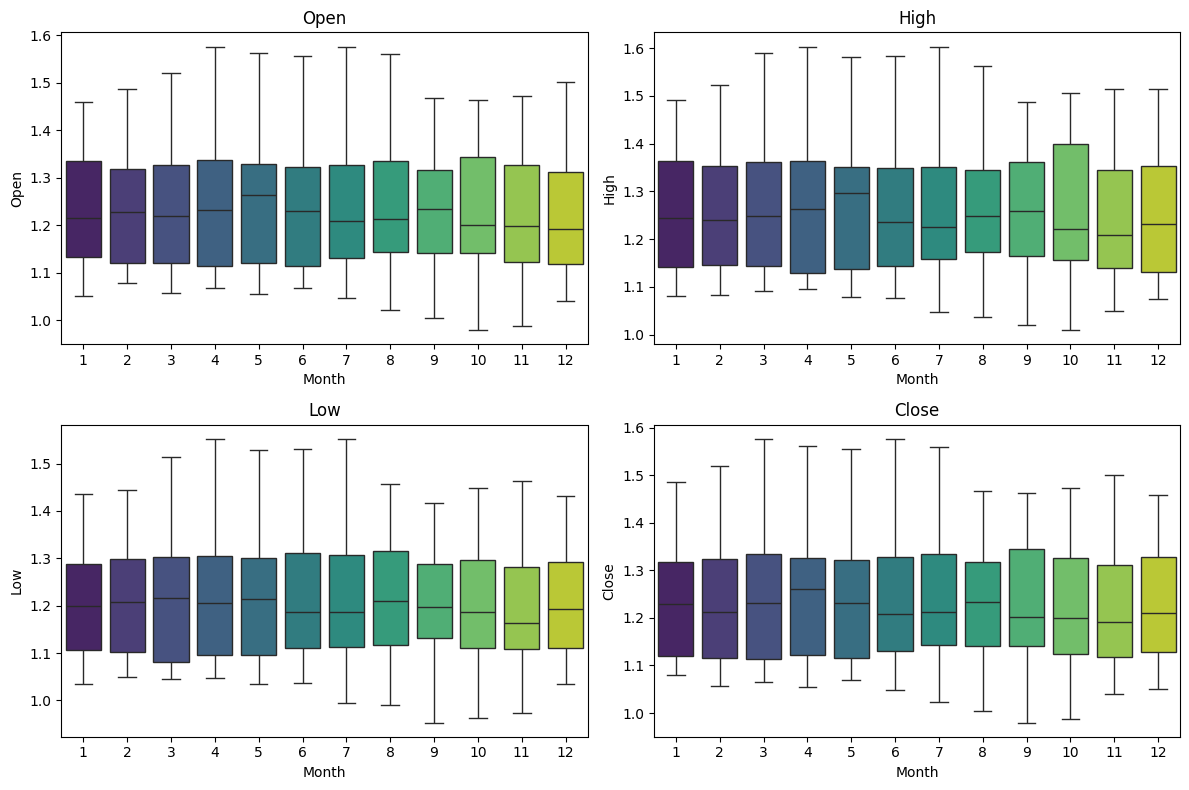

In [9]:
import seaborn as sns
df_forex['Month'] = df_forex.index.month
df_forex['Year'] = df_forex.index.year

# Définir une palette de couleurs pour les mois
palette = sns.color_palette("viridis", 12)  # Utilisez une palette avec 12 couleurs pour les 12 mois de l'année

# Regrouper les données par mois et par année
df_monthly_stats = df_forex.groupby(['Year', 'Month']).agg({'Open': 'mean', 'High': 'mean', 'Low': 'mean', 'Close': 'mean'})

# Créer une figure pour les box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Tracer les box plots pour chaque caractéristique avec une couleur différente pour chaque mois
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    sns.boxplot(data=df_monthly_stats, x=df_monthly_stats.index.get_level_values('Month'), y=col, ax=axes[i//2, i%2], palette=palette)
    axes[i//2, i%2].set_title(col)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les box plots
plt.show()


C:\Users\yskon\AppData\Local\Temp\ipykernel_26548\1788191553.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




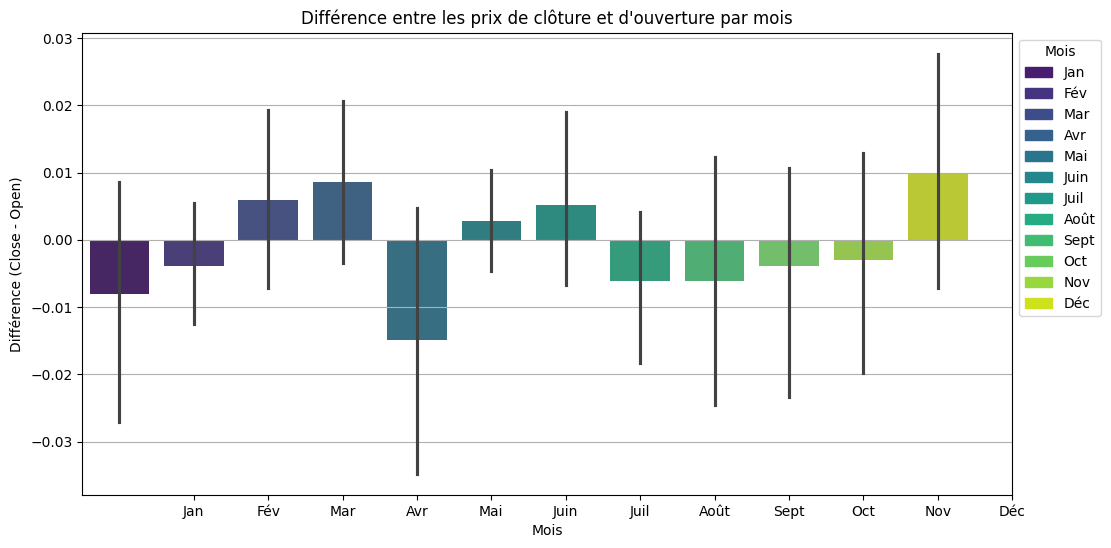

In [10]:
# Calculer les moyennes mensuelles des prix d'ouverture et de clôture
monthly_mean = df_forex.groupby(['Year', 'Month']).agg({'Open': 'mean', 'Close': 'mean'}).reset_index()

# Calculer la différence entre les prix de clôture et d'ouverture pour chaque mois
monthly_mean['Difference'] = monthly_mean['Close'] - monthly_mean['Open']

# Réorganiser les mois dans l'ordre
monthly_mean['Month'] = pd.Categorical(monthly_mean['Month'], categories=range(1, 13), ordered=True)

# Définir la palette de couleurs
palette = sns.color_palette('viridis', n_colors=12)

# Afficher les moyennes mensuelles
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_mean, x='Month', y='Difference', palette='viridis')
plt.title('Différence entre les prix de clôture et d\'ouverture par mois')
plt.xlabel('Mois')
plt.ylabel('Différence (Close - Open)')

plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc'])
plt.grid(axis='y')

# Ajouter les légendes manuellement avec les mêmes couleurs que les barres
legend_labels = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc']
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(legend_labels))]
plt.legend(handles, legend_labels, title='Mois', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Ce graphique  montrer la différence moyenne entre les prix de clôture et d'ouverture pour chaque mois,
 les mois où il est généralement plus favorable d'investir (différence positive) : Mars - Novembre
  et ceux où il est plus favorable de vendre (différence négative) : Avril et Décembre

## Stocks_Data

In [11]:
import pandas as pd
import json

# Charger les données JSON à partir du fichier
with open("stocks_data.json", "r") as f:
    data = json.load(f)

# Convertir le dictionnaire en DataFrame
df = pd.DataFrame.from_dict(data, orient='index')


df.head()


,address1,city,state,zip,country,phone,fax,website,industry,industryKey,...,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,address2,grossProfits,industrySymbol
A,5301 Stevens Creek Boulevard,Santa Clara,CA,95051,United States,800 227 9770,866 497 1134,https://www.agilent.com,Diagnostics & Research,diagnostics-research,...,0.313,-0.087,0.50710,0.24543,0.26836,USD,2.5401,NaN,NaN,NaN
AA,201 Isabella Street,Pittsburgh,PA,15212-5858,United States,412 315 2900,NaN,https://www.alcoa.com,Aluminum,aluminum,...,NaN,-0.026,0.06995,0.04483,-0.02736,USD,NaN,Suite 500,NaN,NaN
AACG,Building No. 2,Beijing,NaN,100022,China,86 10 6518 1133,86 10 5869 8106,https://www.atai.net.cn,Education & Training Services,education-training-services,...,NaN,0.141,0.50751,-0.10827,-0.13253,CNY,NaN,"East Gate, Floor 1 Jian Wai Soho No.39 Dong Sa...",NaN,NaN
AACI,1760 Market Street,Philadelphia,PA,19103,United States,215 543 6886,NaN,https://armadaacq.com,Shell Companies,shell-companies,...,NaN,NaN,NaN,NaN,NaN,USD,NaN,Suite 602,NaN,NaN
AACIW,1760 Market Street,Philadelphia,PA,19103,United States,215 543 6886,NaN,https://armadaacq.com,Shell Companies,shell-companies,...,NaN,NaN,NaN,NaN,NaN,USD,NaN,Suite 602,NaN,NaN


In [12]:
df.columns

Index(['address1', 'city', 'state', 'zip', 'country', 'phone', 'fax',
       'website', 'industry', 'industryKey',
       ...
       'earningsGrowth', 'revenueGrowth', 'grossMargins', 'ebitdaMargins',
       'operatingMargins', 'financialCurrency', 'trailingPegRatio', 'address2',
       'grossProfits', 'industrySymbol'],
      dtype='object', length=135)

In [13]:
import json
import pandas as pd

# Charger les données JSON à partir du fichier
with open("Oil_data.json", "r") as file:
    data = json.load(file)

# Convertir les données en DataFrame
df = pd.DataFrame(data["data"])

# Afficher les premières lignes du DataFrame
df.head()


,date,value
0,2024-01-01,74.15
1,2023-12-01,71.9
2,2023-11-01,77.69
3,2023-10-01,85.64
4,2023-09-01,89.43


In [14]:
import json
import pandas as pd

# Charger les données JSON à partir du fichier
with open("commodities_data.json", "r") as file:
    data = json.load(file)

# Convertir les données en DataFrame
df = pd.DataFrame(data["data"])

# Afficher les premières lignes du DataFrame
print(df.head())


         date             value
0  2023-12-01  159.487875753153
1  2023-11-01  165.141828351955
2  2023-10-01  167.803470721623
3  2023-09-01  168.542435750147
4  2023-08-01  161.271623423864


In [15]:
import os
import json
import pandas as pd

# Chemin du dossier APIs
api_folder = "APIs"

# Chemin du sous-dossier crypto_data
crypto_data_folder = os.path.join(api_folder, "crypto_data")

# Liste pour stocker les DataFrames de chaque fichier
dfs = []

# Parcours de tous les fichiers du sous-dossier crypto_data
for filename in os.listdir(crypto_data_folder):
    # Chemin complet du fichier
    filepath = os.path.join(crypto_data_folder, filename)
    
    # Vérifier si le fichier est un fichier JSON
    if filename.endswith(".json"):
        # Lire le contenu JSON du fichier
        with open(filepath, "r") as file:
            data = json.load(file)
            
            # Vérifier si le JSON correspond au format attendu
            if "Meta Data" in data and "Time Series (Digital Currency Monthly)" in data:
                # Extraire les données de la série temporelle
                time_series_data = data["Time Series (Digital Currency Monthly)"]
                
                # Créer un DataFrame à partir des données de la série temporelle
                df = pd.DataFrame(time_series_data).T
                
                # Ajouter le symbole de la cryptomonnaie en tant que colonne
                df["symbol"] = data["Meta Data"]["2. Digital Currency Code"]
                
                # Ajouter le DataFrame à la liste
                dfs.append(df)
            else:
                print(f"Le fichier {filename} ne correspond pas au format attendu.")
    else:
        print(f"Ignorer le fichier {filename} car ce n'est pas un fichier JSON.")

# Concaténer tous les DataFrames dans la liste
merged_df = pd.concat(dfs)

# Afficher le DataFrame fusionné
print("DataFrame fusionné:")
print(merged_df)


Le fichier MIOTA_crypto_data.json ne correspond pas au format attendu.
Le fichier MKR_crypto_data.json ne correspond pas au format attendu.
Le fichier SNX_crypto_data.json ne correspond pas au format attendu.
Le fichier THETA_crypto_data.json ne correspond pas au format attendu.
Le fichier USDT_crypto_data.json ne correspond pas au format attendu.
DataFrame fusionné:
           1a. open (CNY) 1b. open (USD) 2a. high (CNY) 2b. high (USD)  \
2024-02-18   617.71443200    85.87000000   686.98880000    95.50000000   
2024-01-31   781.80044800   108.68000000   863.23200000   120.00000000   
2023-12-31   707.05894400    98.29000000   934.30476800   129.88000000   
2023-11-30   585.48710400    81.39000000   791.29600000   110.00000000   
2023-10-31   485.99961600    67.56000000   653.89824000    90.90000000   
...                   ...            ...            ...            ...   
2021-10-31    43.67953920     6.07200000    65.97250560     9.17100000   
2021-09-30    37.11897600     5.160000

In [16]:
merged_df.head()

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD),symbol
2024-02-18,617.71443200,85.87000000,686.98880000,95.50000000,585.91872000,81.45000000,675.11936000,93.85000000,3253128.99900000,3253128.99900000,AAVE
2024-01-31,781.80044800,108.68000000,863.23200000,120.00000000,606.06080000,84.25000000,617.78636800,85.88000000,4372312.48200000,4372312.48200000,AAVE
2023-12-31,707.05894400,98.29000000,934.30476800,129.88000000,625.84320000,87.00000000,781.87238400,108.69000000,7785765.45600000,7785765.45600000,AAVE
2023-11-30,585.48710400,81.39000000,791.29600000,110.00000000,580.30771200,80.67000000,706.84313600,98.26000000,7472195.30300000,7472195.30300000,AAVE
2023-10-31,485.99961600,67.56000000,653.89824000,90.90000000,439.24121600,61.06000000,585.84678400,81.44000000,5301822.25400000,5301822.25400000,AAVE


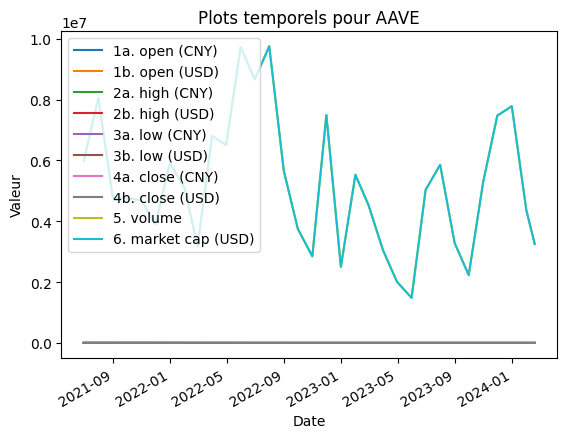

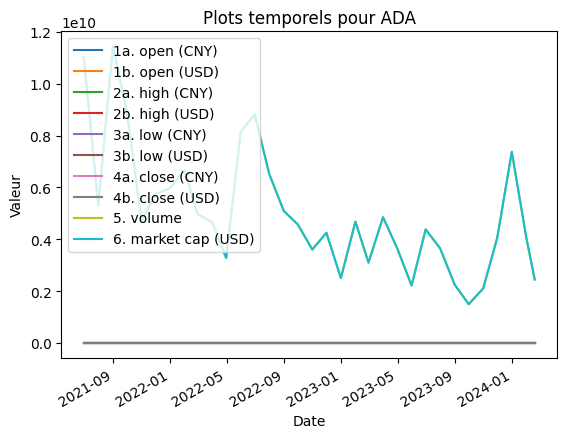

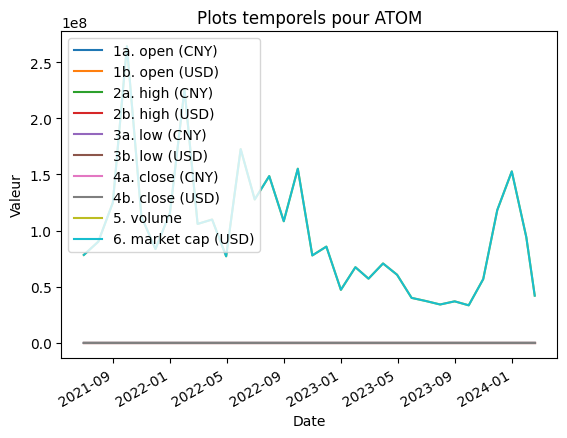

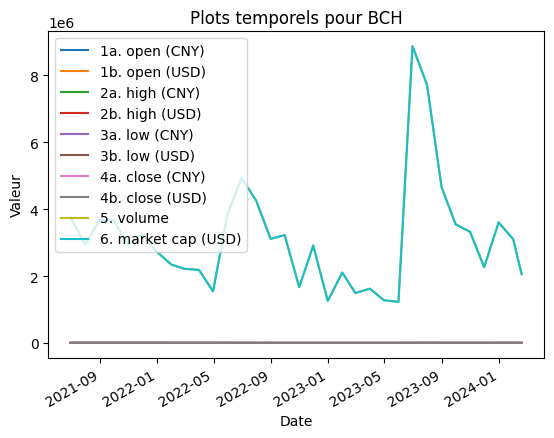

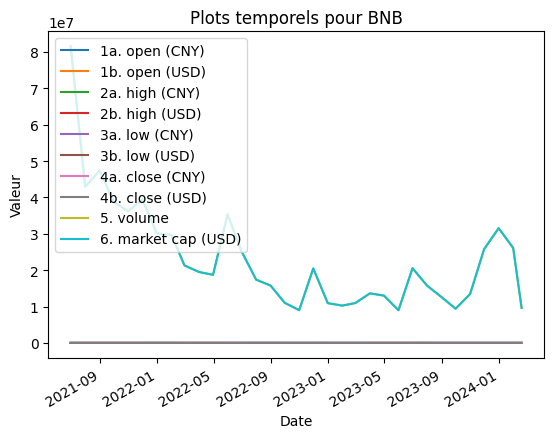

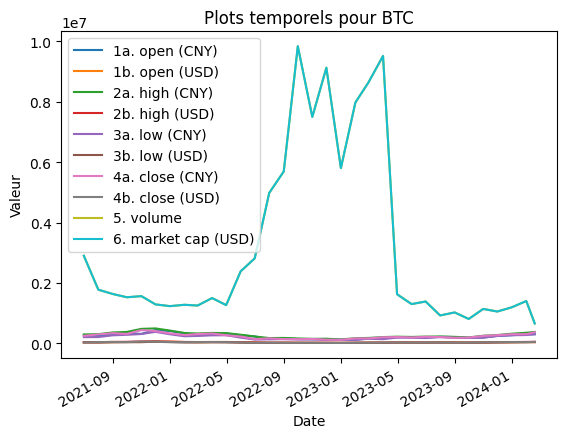

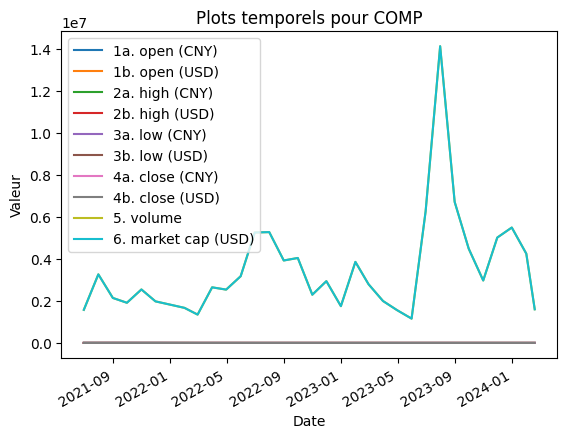

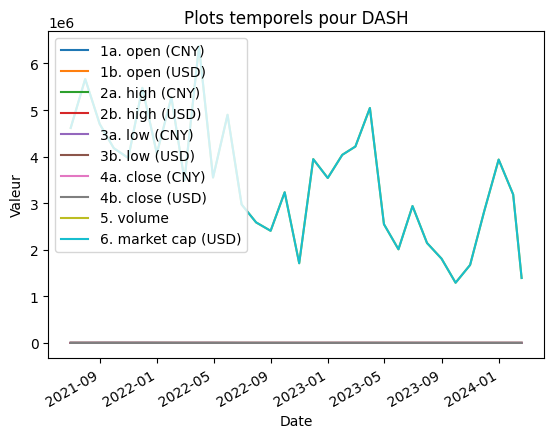

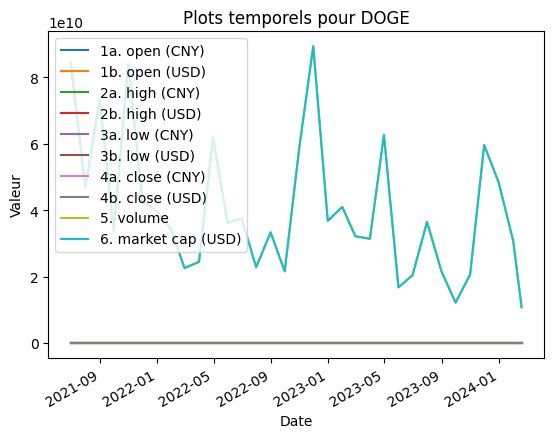

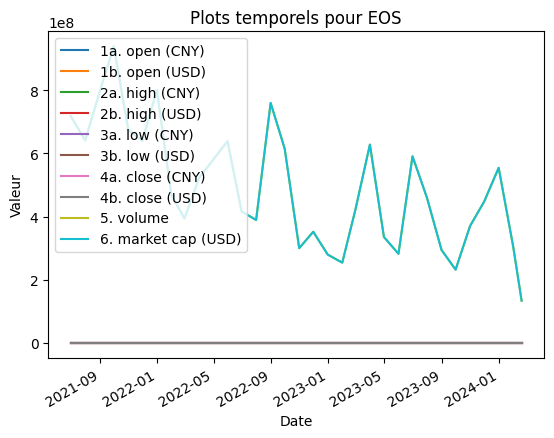

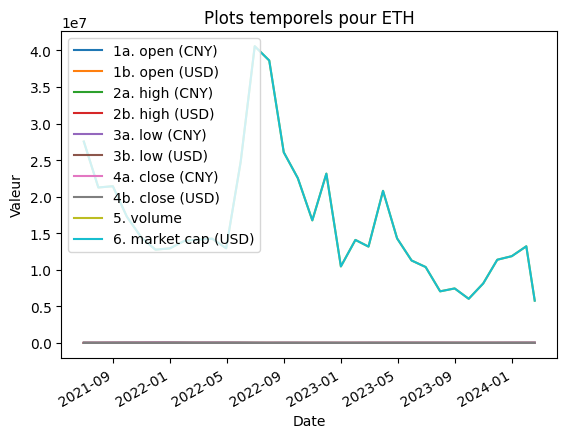

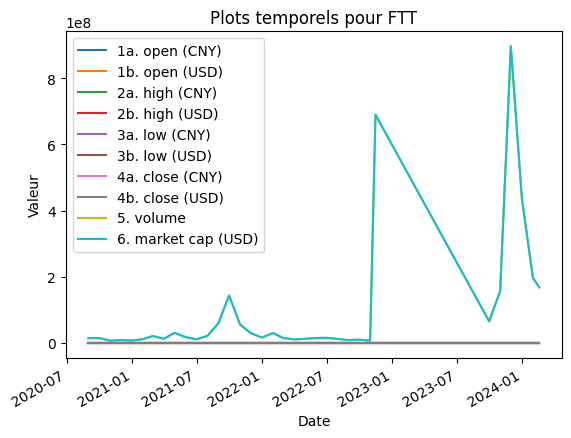

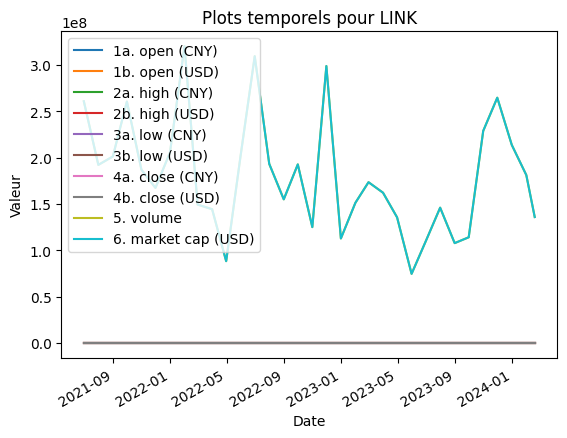

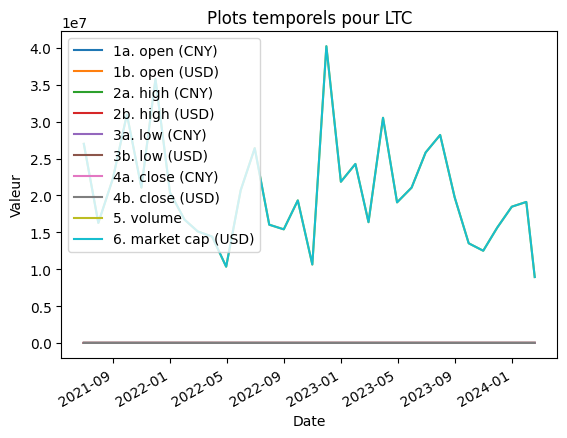

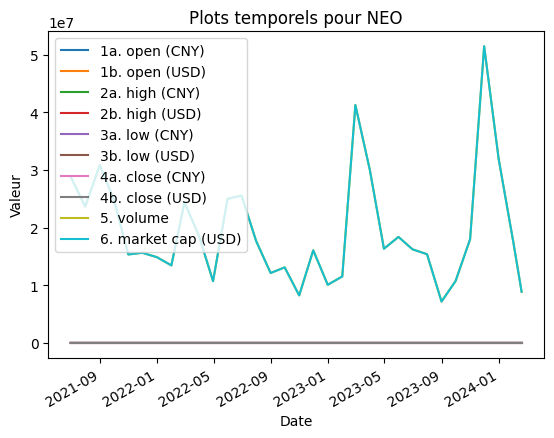

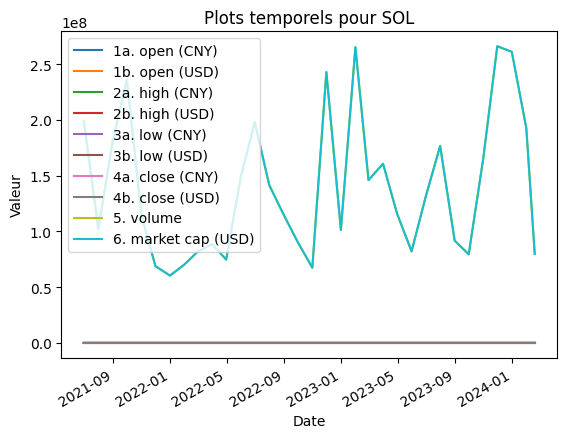

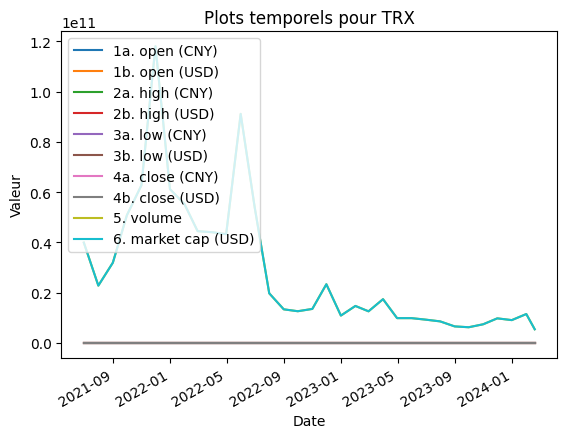

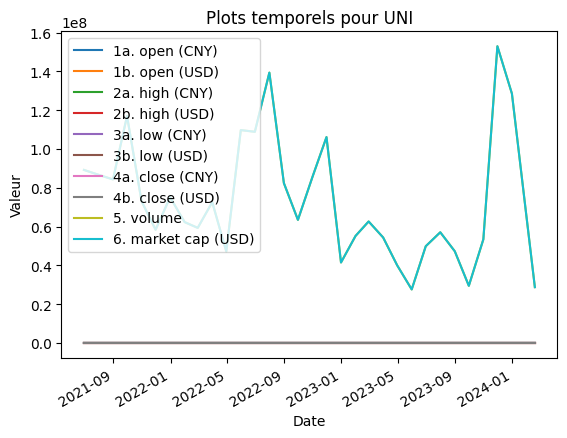

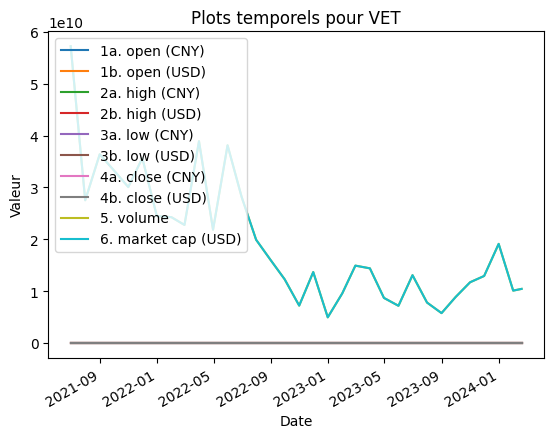

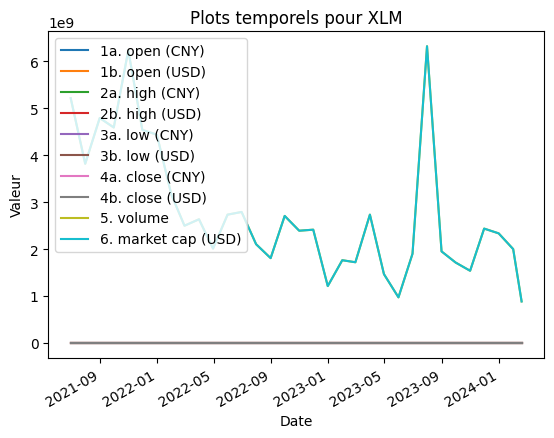

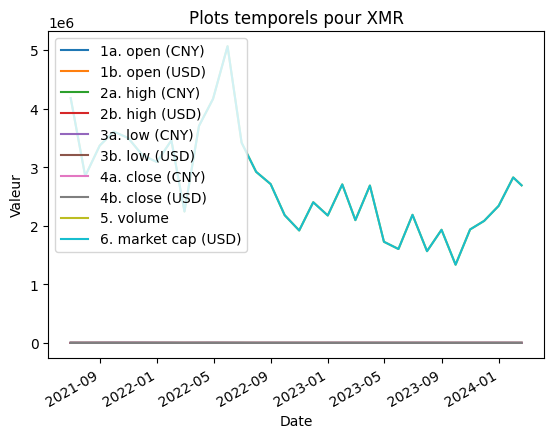

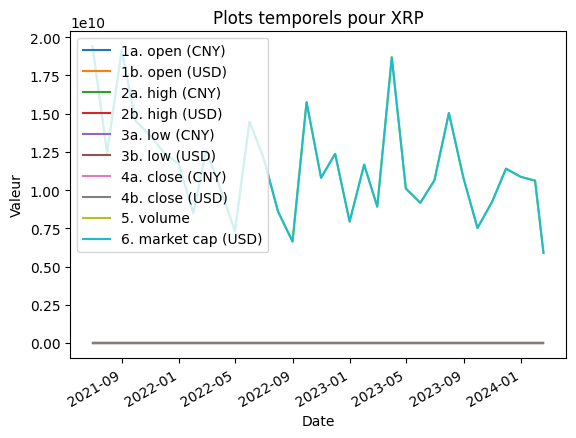

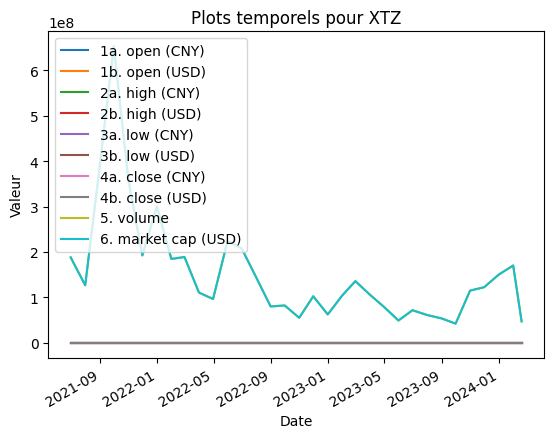

In [17]:
import matplotlib.pyplot as plt

# Définir les colonnes à utiliser pour les tracés temporels
columns_to_plot = ['1a. open (CNY)', '1b. open (USD)', '2a. high (CNY)', '2b. high (USD)', 
                   '3a. low (CNY)', '3b. low (USD)', '4a. close (CNY)', '4b. close (USD)', 
                   '5. volume', '6. market cap (USD)']

# Convertir les colonnes nécessaires en types numériques
merged_df[columns_to_plot] = merged_df[columns_to_plot].astype(float)

# Grouper le DataFrame par le symbole
grouped_df = merged_df.groupby('symbol')

# Parcourir chaque groupe et tracer les données
for symbol, group in grouped_df:
    group = group.sort_index()  # Tri des données par date
    group.index = pd.to_datetime(group.index)  # Conversion de l'index en datetime si ce n'est pas déjà fait
    group[columns_to_plot].plot(title=f"Plots temporels pour {symbol}")
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    plt.legend(loc='upper left')
    plt.show()


In [18]:
import os
import json
import pandas as pd

# Chemin du dossier contenant les fichiers
dossier = "./APIs/taux_change"

# Liste pour stocker les DataFrames chargés à partir des fichiers
dataframes = []

# Parcours de tous les fichiers dans le dossier
for fichier in os.listdir(dossier):
    # Vérifier si le fichier est un fichier JSON commençant par "taux_de_change"
    if fichier.startswith("Taux_de_change") and fichier.endswith(".json"):
        # Chemin complet du fichier
        chemin_fichier = os.path.join(dossier, fichier)
        
        # Charger les données JSON du fichier
        with open(chemin_fichier, "r") as file:
            data = json.load(file)
            
            # Extraire les données nécessaires
            metadata = data.get("Meta Data", {})
            time_series_data = data.get("Time Series FX (Monthly)", {})
            
            # Convertir les données en DataFrame
            df = pd.DataFrame(time_series_data).T
            
            # Ajouter les informations de métadonnées en tant que colonnes
            for key, value in metadata.items():
                df[key] = value
            
            # Ajouter le DataFrame à la liste
            dataframes.append(df)

# Concaténer tous les DataFrames en un seul DataFrame
dataframe_general = pd.concat(dataframes)

# Afficher le DataFrame général
print(dataframe_general)


            1. open  2. high   3. low 4. close  \
2024-02-19  1.45321  1.45704  1.44556  1.45421   
2024-01-31  1.46229  1.47351  1.44946  1.45324   
2023-12-29  1.47607  1.47799  1.45472  1.46224   
2023-11-30  1.46678  1.50441  1.45793  1.47623   
2023-10-31  1.43332  1.47470  1.43118  1.46685   
...             ...      ...      ...      ...   
2005-05-31  1.28590  1.29900  1.22920  1.23050   
2005-04-29  1.29590  1.31240  1.27750  1.28690   
2005-03-31  1.31830  1.34810  1.28520  1.29620   
2005-02-28  1.30220  1.32780  1.27280  1.32220   
2005-01-31  1.35520  1.35800  1.29180  1.30330   

                                           1. Information 2. From Symbol  \
2024-02-19  Forex Monthly Prices (open, high, low, close)            EUR   
2024-01-31  Forex Monthly Prices (open, high, low, close)            EUR   
2023-12-29  Forex Monthly Prices (open, high, low, close)            EUR   
2023-11-30  Forex Monthly Prices (open, high, low, close)            EUR   
2023-10-31  Forex M

In [19]:
import os
import pandas as pd

# Chemin du dossier APIs
api_folder = "APIs"

# Chemin du fichier nasdaq.csv
nasdaq_file = os.path.join(api_folder, "nasdaq.csv")

# Vérifier si le fichier existe
if os.path.exists(nasdaq_file):
    # Lire le fichier CSV
    df = pd.read_csv(nasdaq_file)
    
    # Afficher les premières lignes du DataFrame pour vérification
    df.head()
else:
    print(f"Le fichier {nasdaq_file} n'existe pas.")

df.head(1000)

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$134.75,2.5100,1.898%,3.948710e+10,United States,1999.0,1514490,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$27.39,0.6000,2.24%,4.888346e+09,United States,2016.0,4381614,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$1.4297,-0.0203,-1.40%,4.521022e+07,China,2008.0,67391,Real Estate,Other Consumer Services
3,AACI,Armada Acquisition Corp. I Common Stock,$10.95,0.0000,0.00%,0.000000e+00,United States,2021.0,23,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.025,0.0000,0.00%,0.000000e+00,United States,2021.0,3,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...
995,BMN,BlackRock 2037 Municipal Target Term Trust Com...,$24.04,-0.0350,-0.145%,0.000000e+00,NaN,2022.0,22615,Finance,Trusts Except Educational Religious and Charit...
996,BMO,Bank Of Montreal Common Stock,$94.57,1.9900,2.149%,6.817638e+10,Canada,NaN,507620,NaN,NaN
997,BMR,Beamr Imaging Ltd. Ordinary Share,$10.00,-6.0900,-37.85%,1.288290e+08,Israel,2023.0,9396850,Technology,Computer Software: Prepackaged Software
998,BMRA,Biomerica Inc. Common Stock,$0.9661,-0.0240,-2.424%,1.625139e+07,United States,NaN,37178,Health Care,Biotechnology: In Vitro & In Vivo Diagnostic S...


In [20]:
dataframe_general.head(100)

,1. open,2. high,3. low,4. close,1. Information,2. From Symbol,3. To Symbol,4. Last Refreshed,5. Time Zone
2024-02-19,1.45321,1.45704,1.44556,1.45421,"Forex Monthly Prices (open, high, low, close)",EUR,CAD,2024-02-19 19:50:00,UTC
2024-01-31,1.46229,1.47351,1.44946,1.45324,"Forex Monthly Prices (open, high, low, close)",EUR,CAD,2024-02-19 19:50:00,UTC
2023-12-29,1.47607,1.47799,1.45472,1.46224,"Forex Monthly Prices (open, high, low, close)",EUR,CAD,2024-02-19 19:50:00,UTC
2023-11-30,1.46678,1.50441,1.45793,1.47623,"Forex Monthly Prices (open, high, low, close)",EUR,CAD,2024-02-19 19:50:00,UTC
2023-10-31,1.43332,1.47470,1.43118,1.46685,"Forex Monthly Prices (open, high, low, close)",EUR,CAD,2024-02-19 19:50:00,UTC
...,...,...,...,...,...,...,...,...,...
2016-03-31,1.47286,1.50160,1.43800,1.47728,"Forex Monthly Prices (open, high, low, close)",EUR,CAD,2024-02-19 19:50:00,UTC
2016-02-29,1.51451,1.59141,1.46700,1.47279,"Forex Monthly Prices (open, high, low, close)",EUR,CAD,2024-02-19 19:50:00,UTC
2016-01-29,1.50359,1.61053,1.49400,1.51005,"Forex Monthly Prices (open, high, low, close)",EUR,CAD,2024-02-19 19:50:00,UTC
2015-12-31,1.41061,1.53215,1.40271,1.50136,"Forex Monthly Prices (open, high, low, close)",EUR,CAD,2024-02-19 19:50:00,UTC


In [21]:
import os
import pandas as pd

# Chemin du dossier zillow
zillow_folder = "Zillow_CSV"

# Chemin du fichier CSV
csv_file_1 = os.path.join(zillow_folder, "County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Vérifier si le fichier existe
if os.path.exists(csv_file_1):
    # Lire le fichier CSV
    df_1 = pd.read_csv(csv_file_1)
    
    # Afficher les premières lignes du DataFrame pour vérification
    print(df_1.head())
else:
    print(f"Le fichier {csv_file_1} n'existe pas.")


   RegionID  SizeRank          RegionName RegionType StateName State  \
0      3101         0  Los Angeles County     county        CA    CA   
1       139         1         Cook County     county        IL    IL   
2      1090         2       Harris County     county        TX    TX   
3      2402         3     Maricopa County     county        AZ    AZ   
4      2841         4    San Diego County     county        CA    CA   

                                  Metro  StateCodeFIPS  MunicipalCodeFIPS  \
0    Los Angeles-Long Beach-Anaheim, CA              6                 37   
1    Chicago-Naperville-Elgin, IL-IN-WI             17                 31   
2  Houston-The Woodlands-Sugar Land, TX             48                201   
3             Phoenix-Mesa-Chandler, AZ              4                 13   
4    San Diego-Chula Vista-Carlsbad, CA              6                 73   

      2000-01-31  ...     2023-03-31     2023-04-30     2023-05-31  \
0  202439.173324  ...  776848.2900

In [22]:
import os
import pandas as pd

# Chemin du dossier zillow
zillow_folder = "Zillow_CSV"

# Chemin du fichier CSV
csv_file_2 = os.path.join(zillow_folder, "Metro_mean_doz_pending_uc_sfrcondo_sm_month.csv")

# Vérifier si le fichier existe
if os.path.exists(csv_file_2):
    # Lire le fichier CSV
    df_2= pd.read_csv(csv_file_2)
    
    # Afficher les premières lignes du DataFrame pour vérification
    print(df_2.head())
else:
    print(f"Le fichier {csv_file_2} n'existe pas.")


   RegionID  SizeRank       RegionName RegionType StateName  2018-03-31  \
0    102001         0    United States    country       NaN        51.0   
1    394913         1     New York, NY        msa        NY        68.0   
2    753899         2  Los Angeles, CA        msa        CA        35.0   
3    394463         3      Chicago, IL        msa        IL        51.0   
4    394514         4       Dallas, TX        msa        TX        46.0   

   2018-04-30  2018-05-31  2018-06-30  2018-07-31  ...  2023-03-31  \
0        48.0        45.0        43.0        44.0  ...        49.0   
1        65.0        63.0        64.0        66.0  ...        73.0   
2        32.0        31.0        32.0        33.0  ...        49.0   
3        44.0        40.0        39.0        40.0  ...        46.0   
4        42.0        38.0        37.0        38.0  ...        45.0   

   2023-04-30  2023-05-31  2023-06-30  2023-07-31  2023-08-31  2023-09-30  \
0        43.0        37.0        33.0        32.0  

In [23]:
import os
import pandas as pd

# Chemin du dossier zillow
zillow_folder = "Zillow_CSV"

# Chemin du fichier CSV
csv_file_3 = os.path.join(zillow_folder, "Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Vérifier si le fichier existe
if os.path.exists(csv_file_3):
    # Lire le fichier CSV
    df_3= pd.read_csv(csv_file_3)
    
    # Afficher les premières lignes du DataFrame pour vérification
    print(df_3.head())
else:
    print(f"Le fichier {csv_file_3} n'existe pas.")
df_3.head()


   RegionID  SizeRank       RegionName RegionType StateName    BaseDate  \
0    102001         0    United States    country       NaN  2023-12-31   
1    394913         1     New York, NY        msa        NY  2023-12-31   
2    753899         2  Los Angeles, CA        msa        CA  2023-12-31   
3    394463         3      Chicago, IL        msa        IL  2023-12-31   
4    394514         4       Dallas, TX        msa        TX  2023-12-31   

   2024-01-31  2024-03-31  2024-12-31  
0         0.1         0.4         3.5  
1         0.2         0.2         1.0  
2        -0.1        -1.8         0.7  
3         0.1         0.4         1.6  
4        -0.1         0.0         3.2  


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2024-01-31,2024-03-31,2024-12-31
0,102001,0,United States,country,NaN,2023-12-31,0.1,0.4,3.5
1,394913,1,"New York, NY",msa,NY,2023-12-31,0.2,0.2,1.0
2,753899,2,"Los Angeles, CA",msa,CA,2023-12-31,-0.1,-1.8,0.7
3,394463,3,"Chicago, IL",msa,IL,2023-12-31,0.1,0.4,1.6
4,394514,4,"Dallas, TX",msa,TX,2023-12-31,-0.1,0.0,3.2


    "Metro" suggère que les données sont liées à des zones métropolitaines.
    "zhvf_growth" peut indiquer un indice de croissance des valeurs immobilières.
    "uc_sfrcondo" pourrait signifier que les données concernent à la fois les maisons unifamiliales (single-family residences) et les condos (condominiums).
    "tier_0.33_0.67" peut faire référence à une segmentation ou une catégorisation des données en fonction de certains critères, peut-être liés à la valeur ou à d'autres caractéristiques.
    "sm_sa_month" pourrait signifier une moyenne mobile saisonnière par mois.

good for oil

In [85]:
import pandas as pd
import json
from sqlalchemy import create_engine

def df_to_sql(json_file_path, table_name, hostname, database, username, password, port):
    try:
        # Read JSON file into a DataFrame
        with open(json_file_path, 'r') as file:
            data = json.load(file)
            df = pd.DataFrame.from_dict(data)

        # Create a SQLAlchemy engine
        engine = create_engine(f'postgresql://{username}:{password}@{hostname}:{port}/{database}')

        # Connect to the PostgreSQL database
        conn = engine.connect()

        # Function to flatten nested dictionaries
        def flatten_dict(d):
            flat_dict = {}
            for key, value in d.items():
                if isinstance(value, dict):
                    flat_dict.update(flatten_dict(value))
                else:
                    flat_dict[key] = value
            return flat_dict

        # Flatten nested dictionaries in DataFrame
        for col in df.columns:
            df[col] = df[col].apply(lambda x: flatten_dict(x) if isinstance(x, dict) else x)

        # Convert DataFrame to a list of tuples (each tuple represents a row)
        data_list = [tuple(row) for row in df.to_numpy()]

        # Create table if it does not exist
        create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ({', '.join([f'{col} VARCHAR' for col in df.columns])})"
        conn.execute(create_table_query)

        # Insert data into the table
        for row in data_list:
            insert_query = f"INSERT INTO {table_name} VALUES ({', '.join(['%s'] * len(df.columns))})"
            conn.execute(insert_query, row)

        print(f"DataFrame from {json_file_path} successfully saved to table {table_name} in the database.")
    except Exception as e:
        print("Error:", e)
    finally:
        if conn:
            conn.close()

# Example usage:
if __name__ == "__main__":
    json_file_path = r"C:\Users\yskon\Desktop\Desk_App\Data\Oil_data.json"
    table_name = input("Enter the table name: ")
    hostname = 'localhost'
    database = 'First_test'
    username = 'postgres'
    password = 'Yann'
    port_id = 5432

    df_to_sql(json_file_path, table_name, hostname, database, username, password, port_id)


Error: (psycopg2.ProgrammingError) can't adapt type 'dict'
[SQL: INSERT INTO oili VALUES (%s, %s, %s, %s)]
[parameters: ('Crude Oil Prices WTI', 'monthly', 'dollars per barrel', {'date': '2024-01-01', 'value': '74.15'})]
(Background on this error at: http://sqlalche.me/e/14/f405)


In [63]:
import pandas as pd
import requests
import json

def save_nasdaq_data_to_json(file_path):
    url = 'https://api.nasdaq.com/api/screener/stocks?tableonly=true&limit=25&offset=0&download=true'
    headers = {'Accept-Language': 'en-US,en;q=0.9',
               'Accept-Encoding': 'gzip, deflate, br',
               'User-Agent': 'Java-http-client/'}

    response = requests.get(url, headers=headers)

    # Vérifier si la requête a réussi
    if response.status_code == 200:
        # Extraire les données JSON de la réponse
        json_data = response.json()

        # Enregistrer les données JSON dans un fichier
        with open(file_path, 'w') as json_file:
            json.dump(json_data, json_file)
        
        print(f"Les données du Nasdaq ont été enregistrées dans le fichier {file_path}.")
    else:
        print("La requête vers l'API Nasdaq a échoué.")

# Exemple d'utilisation :
if __name__ == "__main__":
    file_path = "nasdaq.json"
    save_nasdaq_data_to_json(file_path)


Les données du Nasdaq ont été enregistrées dans le fichier nasdaq.json.


In [100]:
import pandas as pd
import json
import psycopg2

def create_table_from_df(df, table_name, conn):
    try:
        # Mapping des types de données Pandas vers les types de données PostgreSQL
        type_mapping = {
            "int64": "INTEGER",
            "float64": "NUMERIC",
            "object": "TEXT"
        }
        
        # Récupérer les noms et types de colonnes
        column_names = df.columns
        column_types = [type_mapping.get(df[col].dtype.name, "TEXT") for col in df.columns]
        
        # Créer la requête de création de table
        columns = ", ".join([f"{name} {type}" for name, type in zip(column_names, column_types)])
        create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ({columns})"
        
        # Exécuter la requête pour créer la table
        with conn.cursor() as cur:
            cur.execute(create_table_query)
        
        print(f"Table {table_name} created successfully.")
    except Exception as e:
        print("Error:", e)

def df_to_sql_data_heads_rows(json_file_path, table_name, hostname, database, username, password, port):
    try:
        # Établir une connexion à la base de données PostgreSQL
        conn = psycopg2.connect(
            host=hostname,
            database=database,
            user=username,
            password=password,
            port=port
        )
        
        # Charger les données JSON dans un DataFrame
        with open(json_file_path, 'r') as file:
            json_data = json.load(file)
        data = json_data['data']['rows']
        df = pd.DataFrame(data)
        
        # Créer la table si elle n'existe pas
        create_table_from_df(df, table_name, conn)
        
        # Convertir le DataFrame en liste de tuples
        records = df.values.tolist()

        # Créer une chaîne de requête d'insertion
        placeholders = ", ".join(["%s"] * len(df.columns))
        insert_query = f"INSERT INTO {table_name} VALUES ({placeholders})"

        # Exécuter la requête d'insertion pour chaque ligne dans le DataFrame
        with conn.cursor() as cur:
            cur.executemany(insert_query, records)
        
        # Valider la transaction
        conn.commit()
        print(f"DataFrame successfully saved to table {table_name} in the database.")
    except Exception as e:
        print("Error:", e)
    finally:
        if conn:
            conn.close()

# Exemple d'utilisation
if __name__ == "__main__":
    json_file_path = r"C:\Users\yskon\Desktop\Desk_App\Data\nasdaq.json"
    table_name = "Oil"
    hostname = 'localhost'
    database = 'First_test'
    username = 'postgres'
    password = 'Yann'
    port_id = 5432

    df_to_sql_data_heads_rows(json_file_path, table_name, hostname, database, username, password, port_id)


Table Oil created successfully.
DataFrame successfully saved to table Oil in the database.
